In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [167]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

In [168]:
outPath = "figures"

In [169]:
pd_table1 = pd.read_csv("Table_2.csv")

In [170]:
df_inner = pd_table1[['Prior knowledge']].copy()
df_inner['Prior knowledge'] = df_inner['Prior knowledge'].str.split(', ')
df_inner = df_inner.explode(['Prior knowledge'])
df_inner = df_inner.value_counts()
df_inner = pd.concat([df_inner, pd.Series({"other":df_inner[df_inner < 4].sum() })], axis=0)
df_inner = df_inner[df_inner > 4]
df_inner

(Gene-Onthology,)      15
(KEGG,)                13
(Reactome,)            11
(Gene-annotations,)     5
other                  23
dtype: int64

In [171]:
## all 
df_all = pd_table1[['Prior knowledge']].copy()
df_all['Prior knowledge'] = df_all['Prior knowledge'].str.split(', ')
df_all = df_all.explode(['Prior knowledge'])
df_all = df_all.value_counts()

## Inner ring
df_inner = pd_table1[['Prior knowledge']].copy()
df_inner['Prior knowledge'] = df_inner['Prior knowledge'].str.split(', ')
df_inner = df_inner.explode(['Prior knowledge'])
df_inner = df_inner.value_counts()
df_inner = pd.concat([df_inner, pd.Series({"other":df_inner[df_inner < 4].sum() })], axis=0)
df_inner = df_inner[df_inner >= 4].sort_values(ascending=False)
df_inner

## Outer ring

extra_part = pd_table1[['Prior knowledge']].copy()
extra_part['Prior knowledge'] = extra_part['Prior knowledge'].str.split(', ')
extra_part = extra_part.explode(['Prior knowledge'])
extra_part = extra_part.value_counts()
extra_part = extra_part[extra_part < 4] 
extra_part = pd.concat([extra_part, pd.Series({"other":extra_part[extra_part < 2].sum()})], axis=0)
extra_part = extra_part[extra_part >= 2]

extra_part = pd.concat([extra_part, pd.Series({"white":df_inner.sum()-23})], axis=0).sort_values(ascending=False)
extra_part

extra_part = extra_part.reindex([
 'other',
 ('Hallmark (MSigDB)',),
 ('MolSigDB',),
 ('ENCODE',),
 ('miRTarBase',),
 ('GSEA',),
  'white'])


In [172]:
''' Prepare colors '''
size = 0.5
basecol = 170
inner_colors = []

for i, cm in enumerate(["Blues", "Oranges", "Greens", "Reds", "RdPu", "Purples", "Greys"]):
    cmap = plt.colormaps[cm]
    inner_colors.append(cmap(basecol))
    if i == 0:
        outer_colors = cmap(np.linspace(0.4,.9, num=len(extra_part.index[1:])))
        outer_colors = np.append(outer_colors, np.array([[1,1,1,1]]), axis=0)

/tmp/ipykernel_26516/3141829665.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches_inner.append(patches_outer[1:]),


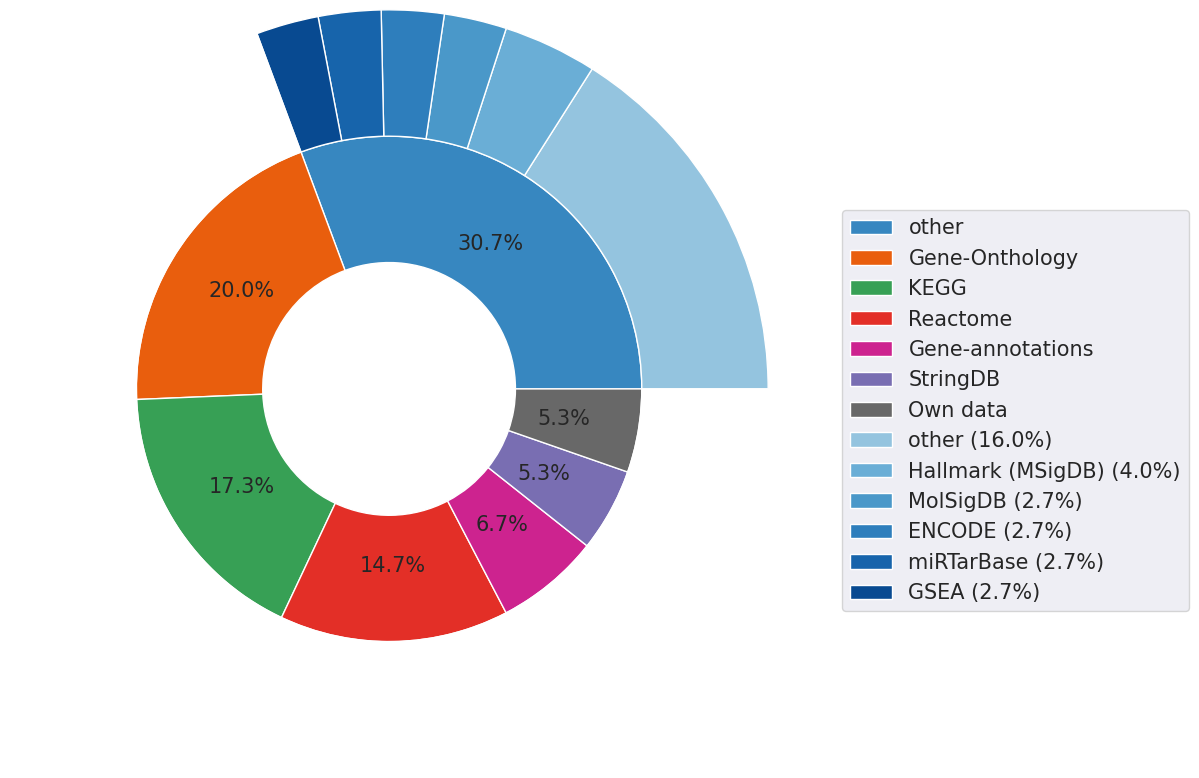

In [225]:
fig, ax = plt.subplots(figsize=(12,8))

inner_labels = [df_inner.index.tolist()[0]]  + [ele[0] for ele in df_inner.index[1:]]
outer_labels = [extra_part.index.tolist()[0]] + [ele[0] for i, ele in enumerate(extra_part.index.tolist()[1:-1])]
perc_outer = round((extra_part[:-1]/df_all.sum())*100,1)
outer_labels_perc = [ele+f" ({num}%)" for ele, num in zip(outer_labels, perc_outer)]


patches_inner, labels, perc_text = ax.pie(df_inner, radius=1, wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors, 
                                  autopct='%1.1f%%', pctdistance=.7, labeldistance=.6)
patches_outer, labels_outer = ax.pie(extra_part, radius=1+size, wedgeprops=dict(width=size, edgecolor='w'), colors=outer_colors)
ax.legend(patches_inner.append(patches_outer[1:]), 
          labels=inner_labels+outer_labels_perc, 
           bbox_to_anchor=(1.2, 0.8), fontsize=15)
#ax.legend(patches_inner, inner_labels, bbox_to_anchor=(1.03, 1.02))

plt.tight_layout()
plt.savefig(f"{outPath}/priorKnowledge.png")

In [205]:
perc_outer

(Hallmark (MSigDB),)     4.0
(MolSigDB,)              2.7
(ENCODE,)                2.7
(miRTarBase,)            2.7
(GSEA,)                  2.7
white                   69.3
dtype: float64

In [208]:
extra_part[:-1]

other                   12
(Hallmark (MSigDB),)     3
(MolSigDB,)              2
(ENCODE,)                2
(miRTarBase,)            2
(GSEA,)                  2
dtype: int64

In [181]:
[extra_part.index.tolist()[1]] + [ele[0] for i, ele in enumerate(extra_part.index.tolist()[:-1]) if i > 0]

[('Hallmark (MSigDB)',),
 'Hallmark (MSigDB)',
 'MolSigDB',
 'ENCODE',
 'miRTarBase',
 'GSEA']

In [ ]:
extra_part

other                   12
(Hallmark (MSigDB),)     3
(MolSigDB,)              2
(ENCODE,)                2
(miRTarBase,)            2
(GSEA,)                  2
white                   52
dtype: int64